In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv("C:/Users/hp/Research/loan_data.csv")

In [3]:
# Printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
# number or rows and column
loan_dataset.shape

(381, 13)

In [5]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [6]:
# Number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Dropping the missing values
loan_dataset = loan_dataset.dropna()

In [8]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
# Label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [10]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


In [11]:
loan_dataset['Dependents'].value_counts()  # Dependent column values

Dependents
0     194
2      47
1      43
3+     24
Name: count, dtype: int64

In [12]:
loan_dataset = loan_dataset.replace(to_replace='3+', value=3)

In [13]:
loan_dataset['Dependents'].value_counts()

Dependents
0    194
2     47
1     43
3     24
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

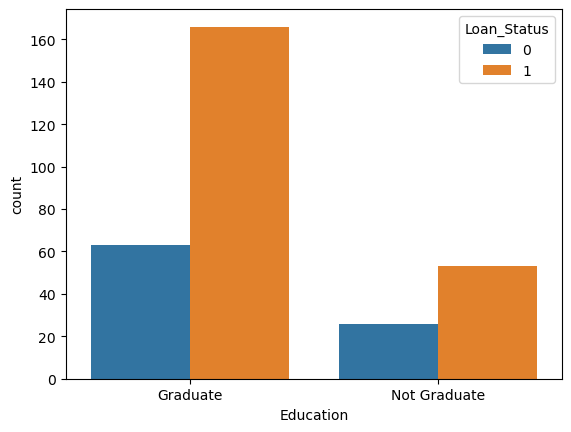

In [14]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)   #education & loan status

<Axes: xlabel='Married', ylabel='count'>

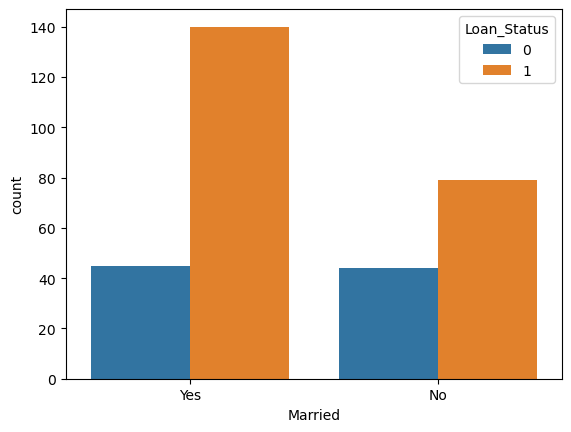

In [15]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)  # maritial status & loan status

In [16]:
#convert categorical columns into numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [17]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1


In [18]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [19]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        1          1          1              0             4583   
1         1        1          0          1              1             3000   
2         1        1          0          0              0             2583   
3         1        0          0          1              0             6000   
4         1        1          0          0              0             2333   
..      ...      ...        ...        ...            ...              ...   
376       1        1          3          1              0             5703   
377       1        1          0          1              0             3232   
378       0        0          0          1              0             2900   
379       1        1          3          1              0             4106   
380       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [20]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=42)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(308, 11) (215, 11) (93, 11)


In [22]:
classifier = svm.SVC(kernel='linear')

In [23]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [24]:
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [25]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8465116279069768


In [26]:
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [27]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8387096774193549


In [35]:
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
roc_score = roc_auc_score(Y_test, Y_pred)

In [36]:
print(f'Accuracy Score: {accuracy*100:0.2f}%')
print(f'Roc Score: {roc_score*100:0.2f}%')

Accuracy Score: 83.87%
Roc Score: 73.32%


In [28]:
input_data = (1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2)

input_data_as_numpy_array = np.asarray(input_data) # changing the input_data to numpy array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) # reshape the array 

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not eligible for loan')
else:
  print('\nThe person is eligible for loan')

[1]

The person is eligible for loan


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
